# TAREA #1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1yJKgmHrRFnBk987HJfeDrMcTEXtk0z7W"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Predicción de la Retención de Empleados
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1u38Inu9eSZM02MlhLIzxY7aguGnzh17v)

![alt text](https://drive.google.com/uc?id=1UrsB2DV303p3F5-P96jZLKF_ZtLPIHg4)


![alt text](https://drive.google.com/uc?id=1DooMDDmd0ilm18AKFPfHar3SU0onyWwe)

# TAREA #2: IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [283]:
# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

#from google.colab import drive
#drive.mount('/content/drive')

In [284]:
# Debe incluir el enlace completo al archivo csv que contiene su conjunto de datos
df = pd.read_csv('https://raw.githubusercontent.com/joanby/ds4b/main/1.%20Human%20Resources%20Data/Human_Resources.csv')

In [285]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [286]:
counter = 0
for type in df.dtypes:
  if type == 'int64':
    counter +=1

print(f"Cantidad tota de variables int64: {counter}")
print(f"Cantidad tota de variables object: {len(df.columns) - counter}")

Cantidad tota de variables int64: 26
Cantidad tota de variables object: 9


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [288]:
# 35 características en total, cada una con 1470 puntos de datos

In [289]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# TAREA #3: VISUALIZACIÓN DEL DATASET

In [290]:
# Reemplazamos las columnas 'Attritition' y 'overtime' por enteros antes de poder llevar a cabo cualquier visualización
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x=='Yes' else 0)
df['Over18'] = df['Over18'].apply(lambda x: 1 if x=='Y' else 0)

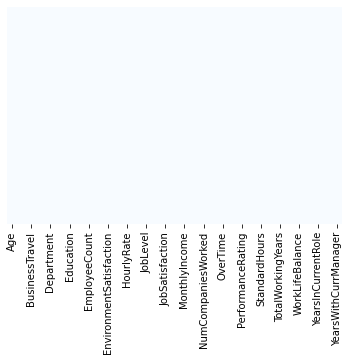

In [291]:
# Veamos si nos faltan datos, ¡afortunadamente no es así!
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

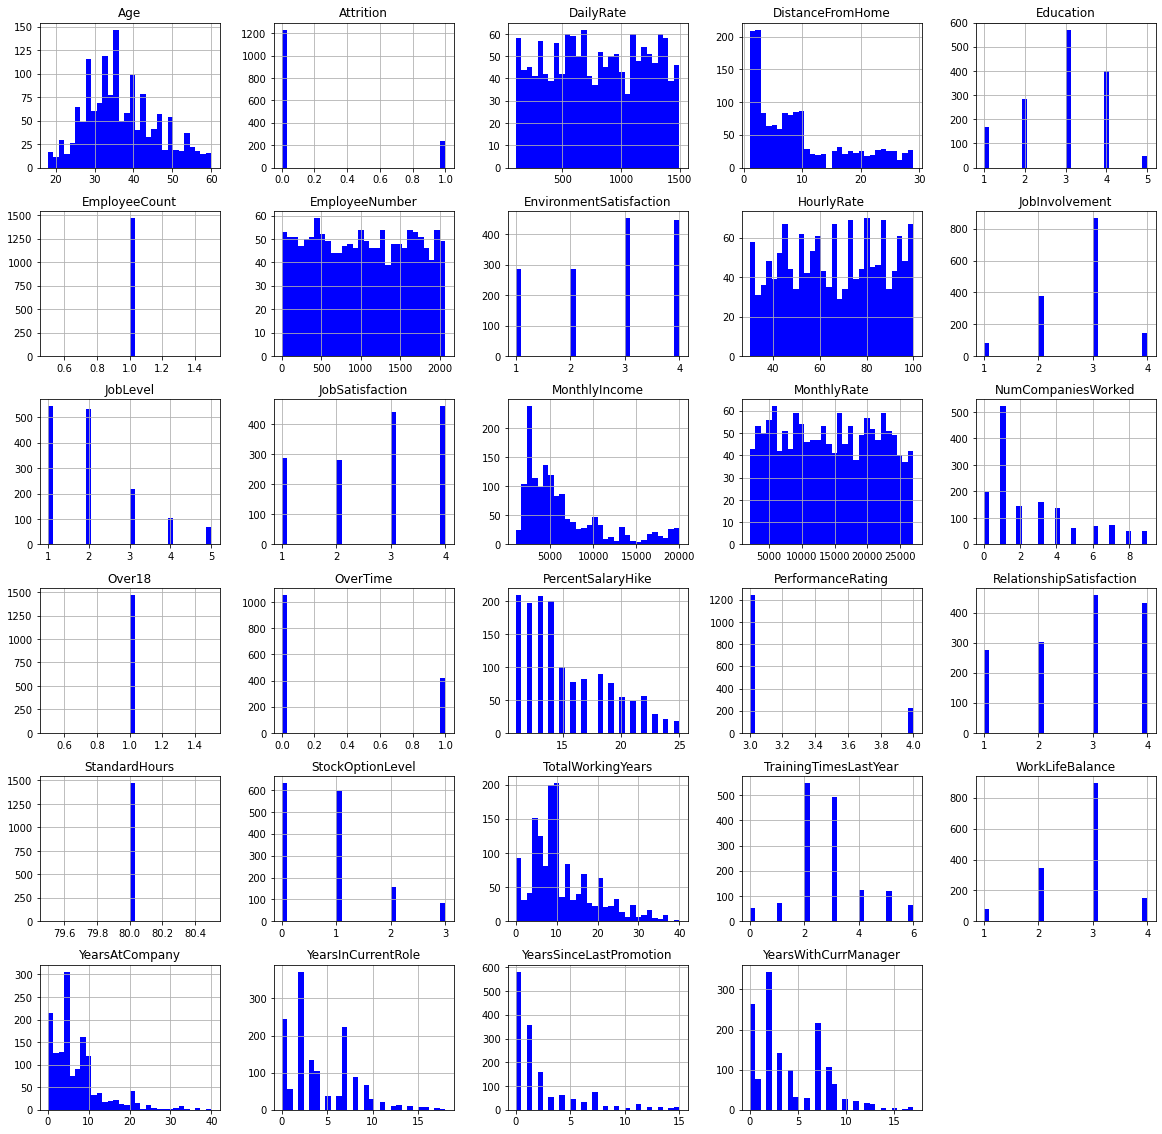

In [292]:
df.hist(bins=30,figsize=(20,20),color='b')
plt.show()
# Algunas características como 'MonthlyIncome' y 'TotalWorkingYears' tienen una distribución con una cola muy larga (long tail distribution)
# Tiene sentido que nos desagamos de 'EmployeeCount' y 'Standardhours' ya que estos campos no cambian de un empleado a otro

In [293]:
# Tiene sentido deshacerse de 'EmployeeCount' , 'Standardhours' y 'Over18' ya que son campos que no cambian de un empleado a otro
# Eliminemos 'EmployeeNumber' también
cols_to_remove = ['EmployeeCount', 'StandardHours','Over18','EmployeeNumber']
df.drop(cols_to_remove,axis=1,inplace=True)

In [294]:
# Veamos cuantos empleados dejan la empresa!
left_df = df[df['Attrition'].isin([1])]
stayed_df = df[df['Attrition'].isin([0])]

In [295]:
# Contamos el número de empleados que se quedaron y que se fueron
# Parece que estamos ante un conjunto de datos desequilibrado
print(f"Numero total de empleados: {df.shape[0]}")
print(f"Numero empleados que dejaron la compañia: {left_df.shape[0]}, {round(left_df.shape[0]/df.shape[0]*100)}%" )
print(f"Numero empleados que siguen en la compañia: {stayed_df.shape[0]}, {round(stayed_df.shape[0]/df.shape[0]*100)}%")

Numero total de empleados: 1470
Numero empleados que dejaron la compañia: 237, 16%
Numero empleados que siguen en la compañia: 1233, 84%


In [296]:
len(left_df)/len(df)*100
# Comparemos la media y el error estándar de los empleados que se quedaron y se fueron
# 'age': la edad media de los empleados que se quedaron es mayor en comparación con los que se fueron
# 'DailyRate': El rate diario de los empleados que se quedaron es mayor
# 'DistanceFromHome': Los empleados que se quedan viven más cerca del trabajo
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Los empleados que se quedan están en general más satisfechos con sus trabajos
# 'StockOptionLevel': Los empleados que se quedan tienen un mayor nivel de stocks options

16.122448979591837

In [297]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


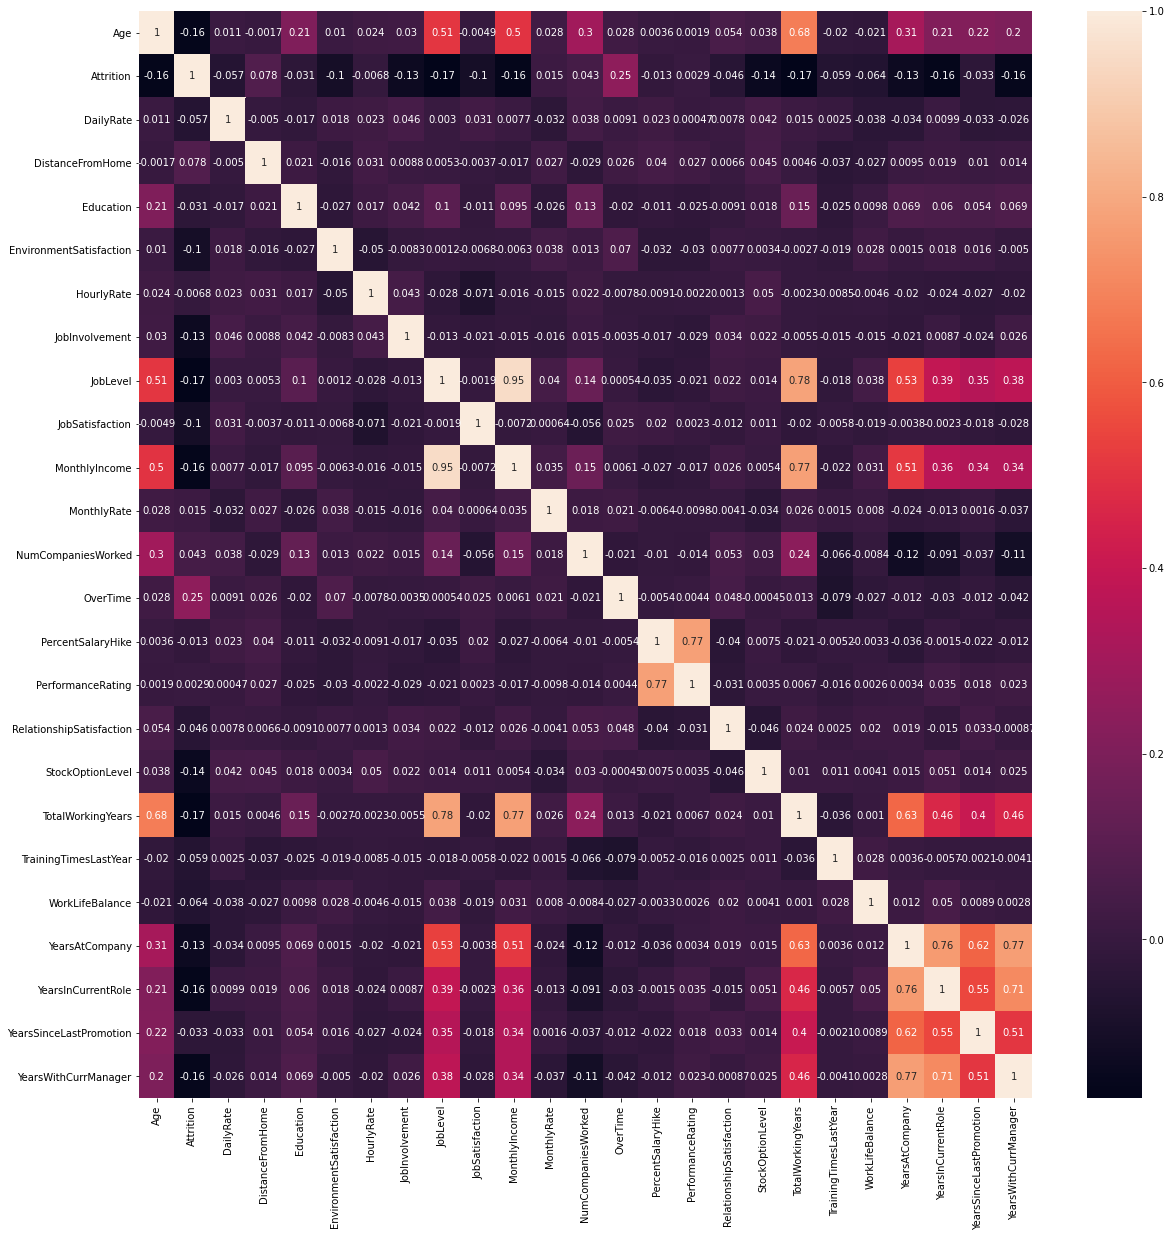

In [298]:
correlations = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations,annot=True)
plt.show()


In [299]:

# Job level está altamente correlacionado con el número total de horas de trabajo
# Monthly income está altamente correlacionado con Job level
# Monthly income está altamente correlacionado con el número total de horas de trabajo
# Age está altamente correlacionado con los ingresos mensuales


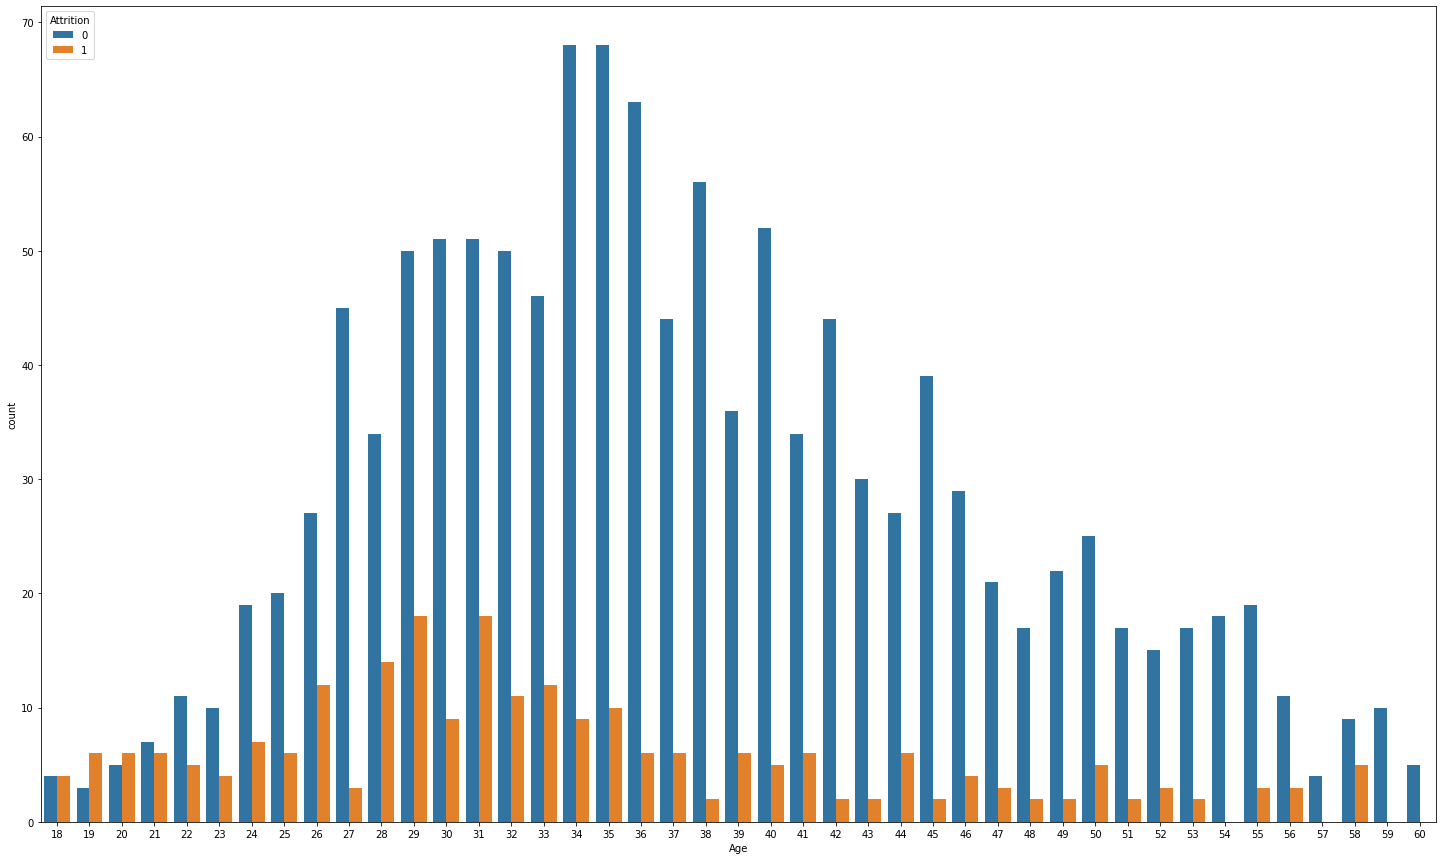

In [300]:
plt.figure(figsize=(25,15))
sns.countplot(x='Age',hue='Attrition',data=df)
plt.show()

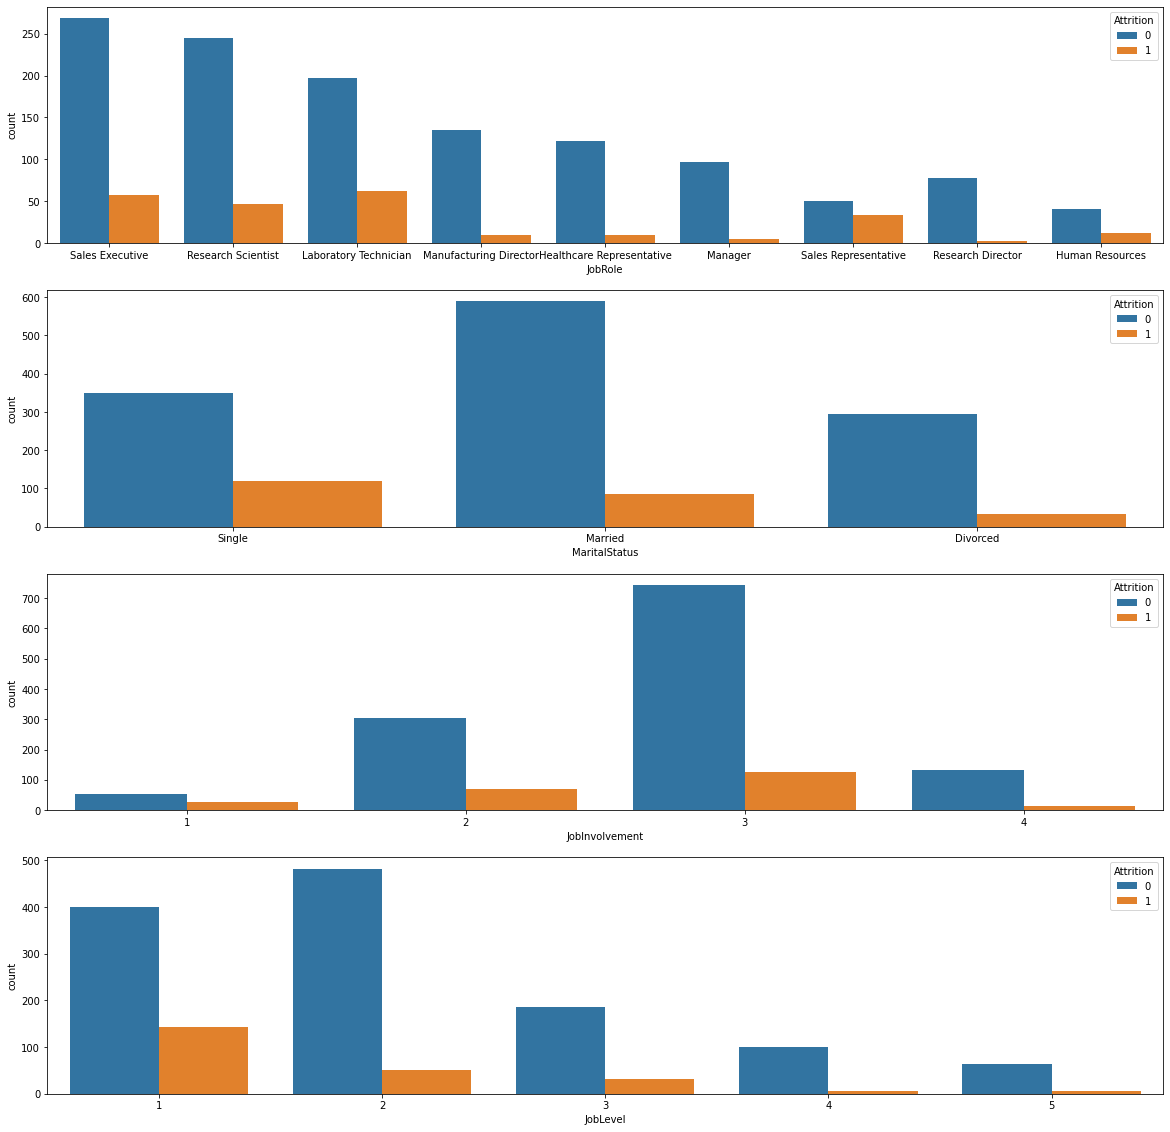

In [301]:
plt.figure(figsize=(20,20))
plt.subplot(411)
sns.countplot(x='JobRole',hue='Attrition',data=df)
plt.subplot(412)
sns.countplot(x='MaritalStatus',hue='Attrition',data=df)
plt.subplot(413)
sns.countplot(x='JobInvolvement',hue='Attrition',data=df)
plt.subplot(414)
sns.countplot(x='JobLevel',hue='Attrition',data=df)

plt.show()


# Los empleados solteros tienden a irse en comparación con los casados ​​y divorciados
# Los representantes de ventas tienden a irse en comparación con cualquier otro trabajo
# Los empleados menos involucrados tienden a dejar la empresa
# Los menos experimentados (nivel laboral bajo) tienden a dejar la empresa

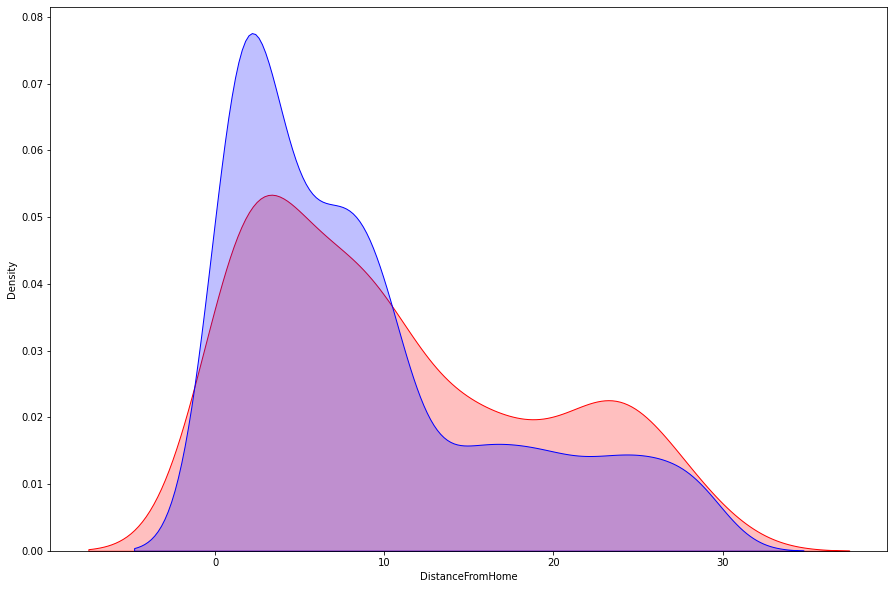

In [302]:
plt.figure(figsize=(15,10))
sns.kdeplot(left_df['DistanceFromHome'],label='Empleados que se marchan',shade=True,color='r')
sns.kdeplot(stayed_df['DistanceFromHome'],label='Empleados que se quedan',shade=True,color='b')

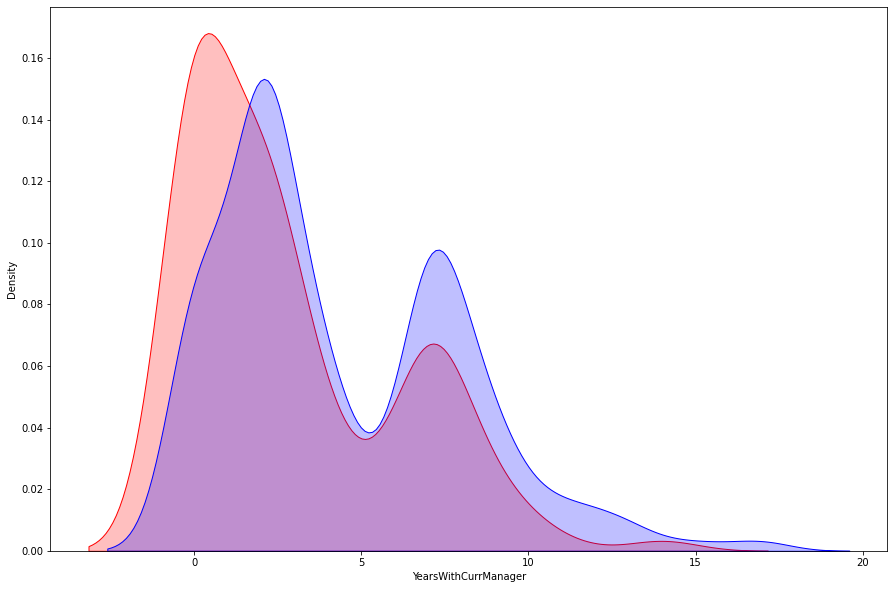

In [303]:
plt.figure(figsize=(15,10))
sns.kdeplot(left_df['YearsWithCurrManager'],label='Empleados que se marchan',shade=True,color='r')
sns.kdeplot(stayed_df['YearsWithCurrManager'],label='Empleados que se quedan',shade=True,color='b')

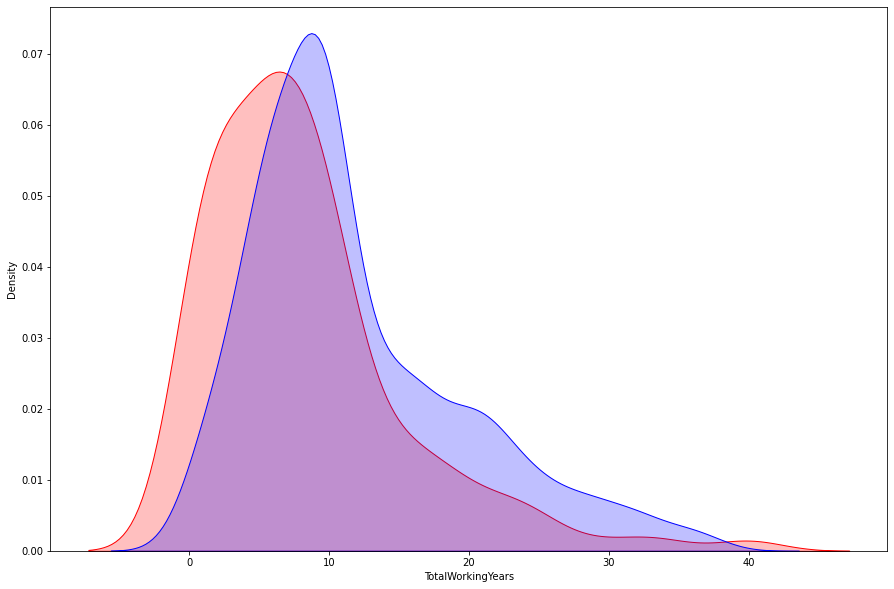

In [304]:
plt.figure(figsize=(15,10))
sns.kdeplot(left_df['TotalWorkingYears'],label='Empleados que se marchan',shade=True,color='r')
sns.kdeplot(stayed_df['TotalWorkingYears'],label='Empleados que se quedan',shade=True,color='b')

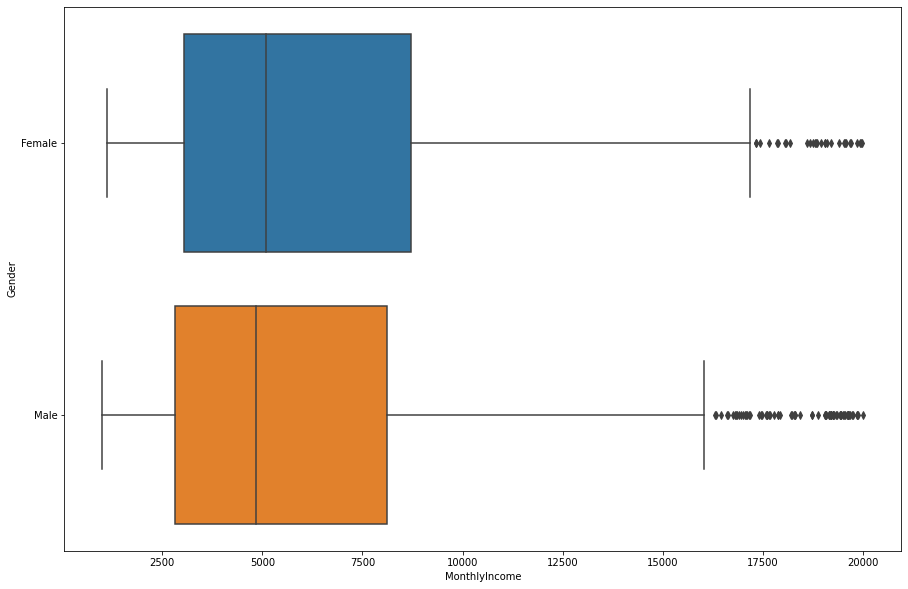

In [305]:
# Veamos el Gender vs. Monthly Income
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome',y='Gender',data=df)

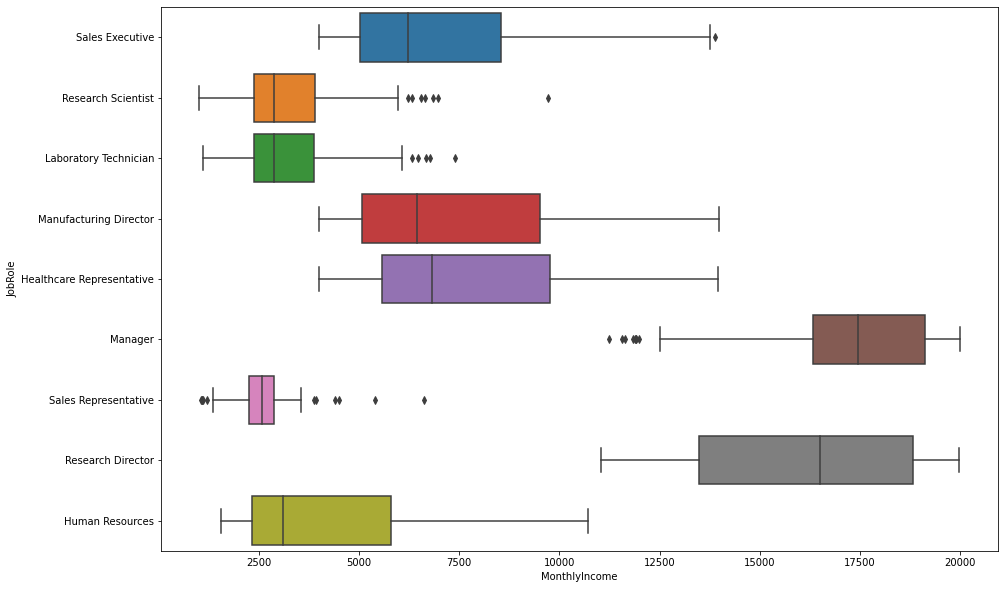

In [306]:
# Veamos el monthly income vs. job role
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome',y='JobRole',data=df)

# TAREA #4: CREAR LOS DATA SETS DE ENTRENAMIENTO Y TESTING Y LLEVAR A CABO LA LIMPIEZA DE DATOS

In [307]:
#!pip install category_encoders

In [308]:
x_cat = df.select_dtypes(include='object')

In [309]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import WOEEncoder

In [310]:
Y = df['Attrition']

x_cat_onehot = OneHotEncoder().fit_transform(x_cat).toarray()
x_cat_onehot = pd.DataFrame(x_cat_onehot)

x_cat_target = WOEEncoder().fit_transform(x_cat,Y)

# Notemos que hemos elminado la columna target, 'Atrittion'
x_numerical = df.select_dtypes(include='int64')
x_numerical = x_numerical[x_numerical.columns.difference(['Attrition'])]


x_all = pd.concat([x_cat_target,x_numerical],axis=1)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [311]:
x_all.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-0.090363,0.302844,-0.107803,-0.098901,0.104384,0.577367,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.548524,-0.180018,-0.107803,0.062497,0.008232,-0.295109,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,-0.090363,-0.180018,-0.149397,0.062497,0.497230,0.577367,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.548524,-0.180018,-0.107803,-0.098901,0.008232,-0.295109,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,-0.090363,-0.180018,-0.195206,0.062497,0.497230,-0.295109,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [312]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(x_all)

# TAREA #5: ENTENDER LA TEORÍA DETRÁS DE LA REGRESIÓN LOGÍSTICA, REDES NEURONALES ALRTIFICIALES Y CLASIFICADORES DE BOSQUES ALEATORIOS

![alt text](https://drive.google.com/uc?id=1zC0o6mkPWhlIwbs1J2LXTVv1IjtTgBLw)

![alt text](https://drive.google.com/uc?id=1JahiZRxjM1gd1cdSlJXBsSmR3cCrZEwr)

![alt text](https://drive.google.com/uc?id=1Vf81FJgCX518kr8FFS-sgzT6Nu7yjMQA)

![alt text](https://drive.google.com/uc?id=11_L_2NlgtZJulG5BI6Lj8MMGpO5F_QJV)

![alt text](https://drive.google.com/uc?id=1azYXfWAiUl1LkzEJXYN-GRZneTfzMsVV)

# TAREA #6: ENTENDER COMO SE EVALUAN LOS MODELOS DE CLASIFICACIÓN

![alt text](https://drive.google.com/uc?id=1Mj1ZhIqcnJl1tfIHeq6R6T8LVzbodtqa)

![alt text](https://drive.google.com/uc?id=1095MBU9oYD1eE65fTrz-8sFgYbbvwAuH)

![alt text](https://drive.google.com/uc?id=1OojsDQecO-69GQFDYsULNhqgxAP9PrU3)

![alt text](https://drive.google.com/uc?id=1G1-il6xFMUuz3nd78kvwiP3mcuXqZM3U)

# TAREA #7: ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO LA REGRESIÓN LOGÍSTICA

In [313]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)

In [314]:
X_train.shape, X_test.shape

((1102, 30), (368, 30))

In [315]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(C=10,multi_class='ovr')
model_fit = model.fit(X_train,Y_train)

Y_preds = model_fit.predict(X_test)

In [316]:
model.get_params()

{'C': 10,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [317]:
print("Accuracy with Test Data {} %".format(round(100*accuracy_score(Y_preds,Y_test))))

Accuracy with Test Data 89.0 %


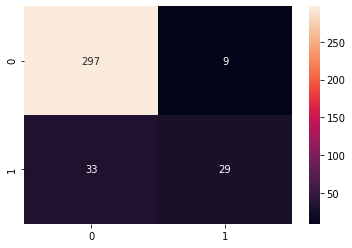

In [318]:
cm = confusion_matrix(Y_test,Y_preds)
sns.heatmap(cm,annot=True,fmt='d')

In [319]:
"""
macro average = (precision of class 0 + precision of class 1)/2 = (1 + 0.02)/2 = 0.51

weighted average is precision of all classes merge together. weighted average = (TP of class 0 + TP of class 1)/(total number of class 0 + total number of class 1 = (28400 + 1)/(28432+49) = 1.
"""
print(classification_report(Y_test,Y_preds,target_names=['empleados que se quedan','empleados que se marchan']))

                          precision    recall  f1-score   support

 empleados que se quedan       0.90      0.97      0.93       306
empleados que se marchan       0.76      0.47      0.58        62

                accuracy                           0.89       368
               macro avg       0.83      0.72      0.76       368
            weighted avg       0.88      0.89      0.87       368



# TAREA #8: ENTRENAR Y EVALUR UN CLASIFICADOR UTILIZANDO BOSQUES ALEATORIOS

In [320]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='gini',min_samples_leaf=1,min_samples_split=3,max_features=None)
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [321]:
Y_preds = model.predict(X_test)

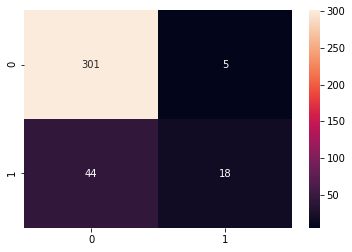

In [322]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix(Y_test,Y_preds)
sns.heatmap(cm,annot=True,fmt='d')

In [323]:
print(classification_report(Y_test,Y_preds,target_names=['empleados que se quedan','empleados que se marchan']))

                          precision    recall  f1-score   support

 empleados que se quedan       0.87      0.98      0.92       306
empleados que se marchan       0.78      0.29      0.42        62

                accuracy                           0.87       368
               macro avg       0.83      0.64      0.67       368
            weighted avg       0.86      0.87      0.84       368



# TAREA #8: ENTRENAR Y EVALUR UN CLASIFICADOR UTILIZANDO DEEP LEARNING

In [324]:
import tensorflow as tf

In [325]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500,activation='relu',input_shape=(30, )))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=64,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [326]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [327]:
epochs_history = model.fit(X_train,Y_train,epochs=50,batch_size=50)

Epoch 1/50
23/23 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.8258
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8412
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 0.3705 - accuracy: 0.8412
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 0.3543 - accuracy: 0.8593
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8684
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 0.3522 - accuracy: 0.8584
Epoch 7/50
23/23 [==============================] - 0s 3ms/step - loss: 0.3227 - accuracy: 0.8793
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 0.2951 - accuracy: 0.8929
Epoch 9/50
23/23 [==============================] - 0s 3ms/step - loss: 0.2790 - accuracy: 0.9065
Epoch 10/50
23/23 [==============================] - 0s 3ms/step - loss: 0.2770 - accuracy: 0.8984
Epoch 11/50
23/23 [

In [328]:
Y_preds = model.predict(X_test)

In [329]:
#Threshold de 0.5 para precisiones de clasificacion
Y_preds = (Y_preds >0.5)

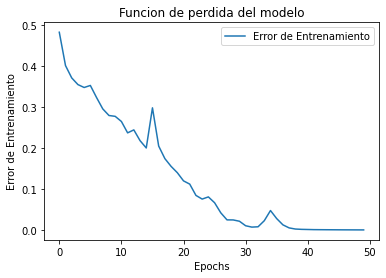

In [330]:
plt.plot(epochs_history.history['loss'])
plt.title('Funcion de perdida del modelo')
plt.xlabel('Epochs')
plt.ylabel('Error de Entrenamiento')
plt.legend(['Error de Entrenamiento'])

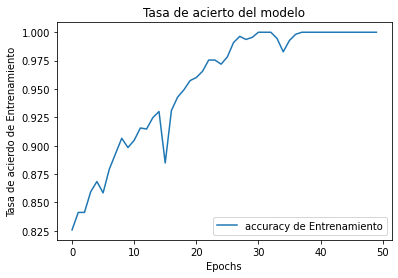

In [331]:
plt.plot(epochs_history.history['accuracy'])
plt.title('Tasa de acierto del modelo')
plt.xlabel('Epochs')
plt.ylabel('Tasa de acierdo de Entrenamiento')
plt.legend(['accuracy de Entrenamiento'])

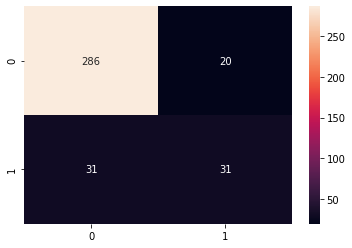

In [332]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix(Y_test,Y_preds)
sns.heatmap(cm,annot=True,fmt='d')

In [333]:
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       306
           1       0.61      0.50      0.55        62

    accuracy                           0.86       368
   macro avg       0.76      0.72      0.73       368
weighted avg       0.85      0.86      0.86       368



# ¡EXCELENTE TRABAJO! USTED DEBE ESTAR ORGULLOSO DE SUS HABILIDADES RECIEN ADQUIRIDAS